# Business Applications of Hypothesis Testing and Confidence Interval Estimation <a id="heading"></a>

1. [**Confidence Interval - Introduction**](#week-1-cii)
2. [**Confidence Interval - Applications**](#week-2-cia)
3. [**Hypothesis Testing**](#week-3-ht)
4. [**Hypothesis Test - Differences in Mean**](#week-4-htdim)
---

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import norm
from math import sqrt
from math import ceil

## Confidence Interval - Introduction <a id="week-1-cii"></a>
[*Back to the heading*](#heading)

### The _t_ distribution <a id="t-dist"></a>

Simple reminder:

**Normal distribution** - a symmetric continuous distribution, has two parameters, the mean and std
**Standard Normal distribution** a Normal distribution with mean = 0 and std = 1

**The t Distribution**, aka the Student’s t Distribution.

A symmetric distribution centered at zero

> Has a single parameter called the degrees of freedomor df. The larger df - the closer t Distribution becomes to the Standard Normal distribution.

* Does not have any standalone business application
* Used as an interim tool to calculate confidence intervals and hypothesis testing
* Has an associated *probability density function*

Works the same way other distribution work in scypy.stats.

Example:

> Suppose we have a t-distribution symmetrically dispersed around mean of 0, with degrees of freedom 10. What is the probability that a random value from this distribution will be greater than 1?

`1-t.cdf(1,10)`

The inverse function (method) of the t Distribution is:

`t.ppf(probability, degrees of freedom)`

### Confidence Interval

* It is an 'interval' with some 'confidence' or probability attached to it
* An interval for some unknown characteristic of the population data


**Example 1:** 

Predicting the actual share of votes of a particular candidate in the US presidential election.

* Only two candidates, A and B
* Wish to predict vote percentage for candidate A
* A random selection of 500 potential voters surveyed
* 300 voters will vote for A and 200 for B
* That is, 60% of surveyed voters will vote for A

> Will candidate A get 60% of all votes in the actual election?

---

A 95% confidence interval for the vote share of candidate A,

**<p style="text-align: center;">[55.7%,  64.3%]</p>**

95% of similarly constructed confidence intervals likely to have the actual vote share for A

There is a 0.95 probability that the actual vote share for A will be between 55.7% and 64.3% 

* Mean ($\mu$) = between 55.7% and 64.3%
* Sample mean ($\bar{x}$) 60%
* Margin of error = +/- 4.3%

---

**<p style="text-align: center;">Confidence interval for the 'population proportion'<p>**

---

**Example 2:**
> What is the average starting salary of **_all business students_** who graduated last year in New York city?

* Population = all students in New York City who finished their business education last year
* Sample = random sample of 100 students
* Sample mean = 61,400\$
* Sample std = _s_ = some number

We wish to find out $\mu$

Answer is:

**<p style="text-align: center;">[lower limit ($\bar{x} - \text{margin of error}$) < $\mu$ < upper limit ($\bar{x} + \text{margin of error}$)]</p>**

---

**<p style="text-align: center;">Сonfidence interval for the 'population mean'<p>**

---

**Example 3:**

> Hurricane Season in Texas

* June through November is the 'Hurricane Season'
* Hurricanes come through the Gulf of Mexico
* Tracking and prediction is of immense importance
---
* Hurricane Ike Struck Galveston, Texas in 2008
* Caused a lot of damage in Houston and Galveston
* Meteorologists were trying to predict where the hurricane will strike
* An **'interval prediction'** done rather than a 'point prediction'
---

### The _z_-statistic and the _t_-statistic

According to the Central Limit Theorem:

Population:

Mean = $\mu$ and Std = $\sigma$

Sample of size _n_:

$$\bar{x} \text{ ~ } Normal\text{ }(\text{sample mean = }\mu, \text{sample std = }\frac{\sigma}{\sqrt{n}})$$

Following this z-statistic is:

$$\bar{x} \text{ ~ } Normal\text{ }(\mu, \frac{\sigma}{\sqrt{n}}) \Rightarrow \frac{\bar{x}-\mu}{\sigma / \sqrt{n}}\text{ ~ }Normal(0,1)$$

Thus, z-statistic is: $$\frac{\bar{x}-\mu}{\sigma / \sqrt{n}}\text{ ~ }Normal(0,1)$$

A more realistic scenario is where the population standard deviation $\sigma$ is not known. In such situations we replace $\sigma$ (population standard deviation) with $s$ (sample standard deviation), which is t-statistic:

$$\text{t-statistic = }\frac{\bar{x}-\mu}{s / \sqrt{n}}\text{ ~ }t_{n-1}$$

### Confidence Interval Construction

*A Stylized example...*

> A random sample of 20 observations from a population data had a mean equal to 70 The standard deviation of the population data is 10. Find an 85% confidence interval for the population mean.

Probability outside the confidence interval is referred to as $\alpha$

... and we wish to construct a (1 - $\alpha$) confidence interval for the population mean

A  (1 - $\alpha$)  confidence interval for the population mean:

$$ \text{Lower limit} \longrightarrow \text{ } \bar{x} - |z_{\alpha/2}|\frac{\sigma}{\sqrt{n}} < \mu < \bar{x} + |z_{\alpha/2}|\frac{\sigma}{\sqrt{n}} \text{ } \longleftarrow \text{Upper limit} $$

Margin of error = $|z_{\alpha/2}|\frac{\sigma}{\sqrt{n}}$

<img src="Images/2_Con_Int-1.png" alt="2_Con_Int-1">

In [2]:
norm.ppf(0.15/2, loc=0, scale=1) # z statistics for 85% confidence interval

-1.4395314709384563

margin of error = $|z_{\alpha/2}|\frac{\sigma}{\sqrt{n}}$ = $\text{1.4395 x }\frac{10}{\sqrt{20}}$

In [3]:
round(1.4395 * (10/sqrt(20)),4)

3.2188

<p style="text-align: center;">$\bar{x} - \text{3.2188}$ < $\mu$ < $\bar{x} + \text{3.2188}$</p>

<p style="text-align: center;">$70 - \text{3.2188}$ < $\mu$ < $70 + \text{3.2188}$</p>

**<p style="text-align: center;">[66.78 < $\mu$ < 73.22]</p>**

...a 85% confidence interval for the population mean

---

### Quiz 1

In [4]:
quiz_data = pd.read_excel("Excel files/1. Confidence Interval.xlsx", "Sheet1", index_col=None, na_values=["NA"])

In [5]:
quiz_data.head()

,Manager ID,Stock Return
0,1,23.22
1,2,7.95
2,3,16.38
3,4,1.02
4,5,12.34


1.

Suppose we have a t-distribution symmetrically dispersed
around mean of 0, with degrees of freedom 10. 

What is the probability that a random value from this distribution will be
greater than 1? Round to 2 decimal places. 

In [6]:
round(1-t.cdf(1,10),2)

0.17

2.

Similarly, what is the probability that the value will fall between -1 and 1? Round to two decimals. 

In [7]:
round(t.cdf(1,10) - t.cdf(-1,10),2)

0.66

3.

![1_Distribution-1](Images/1_Distribution-1.png)

In the t-distribution with 10 degrees of freedom given above, what is the correct formula to calculate the value that cuts of a probability of 10% to the left of that value?

In [8]:
t.ppf(0.1, 10)

-1.3721836411102861

4.

The quiz data shows how a sample of portfolio managers fared on the stock market for the previous year. The numbers are in 'percentage', for example a stock return of 23.22 implies that the stock return was 23.22%. Each number represents a manager's most recent annual return.

Construct a histogram with an appropriate bin size to visualize the data. How are the returns distributed? Choose the most appropriate option from the following.

<AxesSubplot:>

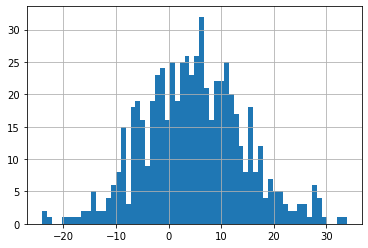

In [9]:
quiz_data["Stock Return"].hist(bins=len(quiz_data)//10) # Normal distribution

5.

What is the average return for the sample of portfolio managers in the data? For the rest of the quiz, provide your answer rounded to two decimal places.

In [10]:
round(quiz_data["Stock Return"].mean(),2)

4.76

6.

What is the sample standard deviation of return for the portfolio managers? Provide your answer rounded to two decimal places.

In [11]:
round(quiz_data["Stock Return"].std(),2)

9.55

7.

Suppose we know that the actual population standard deviation is 9 (i.e. 9%). We wish to construct a confidence interval for the average return for the population of portfolio managers. Use the value of zα/2 to be 2. What is the resulting confidence interval?

HINT: Please use the formula for confidence interval of a population mean using the z-statistic.

In [12]:
margin_of_error = 2 * (9/sqrt(len(quiz_data)))
sample_mean = quiz_data["Stock Return"].mean()
lower_limit = round(sample_mean - margin_of_error, 2)
upper_limit = round(sample_mean + margin_of_error, 2)
print(f"Confidence interval: [{lower_limit}, {upper_limit}]")

Confidence interval: [4.04, 5.48]


8.

How many portfolio returns in the data lie within this confidence interval?

HINT: you can either use the COUNTIF function or sort the data and then manually count the observations

In [13]:
len(quiz_data[(quiz_data["Stock Return"] >= lower_limit) & (quiz_data["Stock Return"] <= upper_limit)])

34

## Application of Confidence Interval <a id="week-2-cia"></a>
[*Back to the heading*](#heading)

### Another example of confidence interval for a **_population mean_**:

In [14]:
house_data = pd.read_excel("Excel files/Home_Sizes.xlsx", "Sheet1", index_col=None, na_values=["NA"])

A person wishes to explore the size of single family houses that are typically available for purchase in a particular neighborhood of Houston in Texas. She manages to get hold of a list containing house sizes of a sample of 100 houses that were sold in the past two years. The data is provided in the excel data file Home_Sizes.xlsx, and given this data she wishes to assess the average size of houses typically available for purchase in this neighborhood.

Note that:
> * Population standard deviation not known
* Need to use calculation for confidence interval based on the t-statistic

In [15]:
alpha = 0.05
n = len(house_data)
degrees_of_freedom = n - 1
x_bar = house_data["Size (sq feet)"].mean()
t_statistic = t.ppf(alpha/2, degrees_of_freedom)
s = house_data["Size (sq feet)"].std()
margin_of_error = abs(t_statistic) * (s / sqrt(n))
lower_limit = round(x_bar - margin_of_error, 4)
upper_limit = round(x_bar + margin_of_error, 4)
print("95% confidence interval for the average (population mean) house size:",
      f"\n[{lower_limit} < population mean < {upper_limit}] square feet")

95% confidence interval for the average (population mean) house size: 
[3048.2174 < population mean < 3428.2626] square feet


### Another example of confidence interval for a **_population proportion_**:

A Consultancy firm surveyed a randomly selected set of 210 CEOs of ‘fast growing small companies’ in the US and Europe. Only 51% of these executives had a management succession plan in place, the remaining did not have one

Use this information to compute a 90% confidence interval to estimate the proportion of all ‘fast growing small companies’  that have a management succession plan.

Here's the formula for calculating a confidence interval for a population proportion:

$$ \hat{p} - |z_{\alpha/2}|\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} < p < \hat{p} + |z_{\alpha/2}|\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

Where:
>* $\hat{p}$ is a sample proportion 
* $p$ is a population proportion
* $|z_{\alpha/2}|\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$ is a margin of error

In [16]:
n = 210
sample_proportion = 0.51
z_statistic = norm.ppf(0.1/2, loc=0, scale=1)
margin_of_error = z_statistic * sqrt((sample_proportion * (1 - sample_proportion))/n)
lower_limit = round(sample_proportion - margin_of_error, 4)
upper_limit = round(sample_proportion + margin_of_error, 4)
print("90% confidence interval for the population proportion of all",
      "fast growing small companies that have a management succession plan:",
      f"\n[{lower_limit} < population proportion < {upper_limit}] or",
      f"\n[{round(100 * lower_limit, 1)}% < population proportion < {round(100 * upper_limit, 1)}%]")

90% confidence interval for the population proportion of all fast growing small companies that have a management succession plan: 
[0.5667 < population proportion < 0.4533] or 
[56.7% < population proportion < 45.3%]


#### Confidence Interval

for the unknown <span style="text-decoration: underline">Population Mean</span>:

1. $\bar{x} - |z_{\alpha/2}|\frac{\sigma}{\sqrt{n}} < \mu < \bar{x} + |z_{\alpha/2}|\frac{\sigma}{\sqrt{n}}$
2. $\bar{x} - |t_{\alpha/2}|\frac{s}{\sqrt{n}} < \mu < \bar{x} + |t_{\alpha/2}|\frac{s}{\sqrt{n}}$

for the unknown <span style="text-decoration: underline">Population Proportion</span>:

3. $\hat{p} - |z_{\alpha/2}|\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} < p < \hat{p} + |z_{\alpha/2}|\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$

### Sample size calculation

How big a Sample to take?
* A pollster wanting to make a prediction about a particular candidate’s vote share in the US presidential election.
* A quality control manager at a battery manufacturer wanting to estimate the average number of defective batteries contained in a box shipped by the company.

> Different industries may have different rule of thumb strategies for sample size selection.

Typically we are interested in:

* the **_Population Mean_**
* the __*Population Proportion*__

... and we build confidence intervals for these unknown quantities

**Example 1**:

The pollster may want to have a margin of error+/- 3% with a confidence level of 95%

The quality control manager may want to assess the average number of defectives in a box with a margin of errorof plus minus 0.3 batteries and a confidence level of 95%.

A quality control manager at a battery manufacturer wants to estimate the average number of defective batteries contained in a box shipped by the company. 

> How many boxes does she need to open to figure out the average number of defective batteries contained in a box?

To answer this question we'll need the population standard deviation (or an estimate of such). In this case the manager has some historic data and according to that the population standard deviation is 0.9.

Here's a reminder of the confidence interval for the Population Mean:

$$ \bar{x} - |z_{\alpha/2}|\frac{\sigma}{\sqrt{n}} < \mu < \bar{x} + |z_{\alpha/2}|\frac{\sigma}{\sqrt{n}} $$

We can derrive the sample size from the margin of error:

$|z_{\alpha/2}|\frac{\sigma}{\sqrt{n}} = 0.3$

$0.3 = $ `abs(norm.ppf(0.05/2, loc=0, scale=1))` $\times\frac{\sigma}{\sqrt{n}}$

In [17]:
abs(round(norm.ppf(0.05/2, loc=0, scale=1), 2))

1.96

$0.3 = 1.96\times\frac{\sigma}{\sqrt{n}}$

$0.3 = 1.96\times\frac{0.9}{\sqrt{n}}$

$\sqrt{n}=1.96\times\frac{0.9}{0.3}$

$n=(1.96\times\frac{0.9}{0.3})^2$

Or

$n=(|z_{\alpha/2}|\times\frac{\sigma}{\text{margin of error}})^2$

In [18]:
ceil((1.96*(0.9/0.3))**2)

35

$n=35$

---

**Example 2**:

> A pollster wanting to make a prediction about a particular candidate’s vote share in the US presidential election. How many voters should the pollster survey? The pollster in the prediction wants to have a margin of error +/- 3% with a confidence level of 95%

Here's a reminder of the confidence interval for the Population Proportion:

$$\hat{p} - |z_{\alpha/2}|\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} < p < \hat{p} + |z_{\alpha/2}|\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

We can derrive the sample size from the margin of error as well:

$|z_{\alpha/2}|\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} = 0.03$

$0.03 = $ `abs(norm.ppf(0.05/2, loc=0, scale=1))` $\times\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$

In [19]:
abs(round(norm.ppf(0.05/2, loc=0, scale=1), 2))

1.96

$0.03^2 = 1.96^2\times\frac{\hat{p}(1-\hat{p})}{n}$

$n = \frac{1.96^2}{0.03^2}\times\hat{p}(1-\hat{p})$

We should use a conservative estimate of $\hat{p}$. To find it out we should maximise $n$. $n$ is maximised when $\hat{p}$ is maximised. To find out the maximised $\hat{p}$ we should take the first derivative of $f(\hat{p}) = \hat{p}(1-\hat{p})$ and set it to zero. Thus $\hat{p} = 0.5$. And thus we have:

$n = \frac{1.96^2}{0.03^2}\times0.5(1-0.5)$

or

$n = (\frac{|z_{\alpha/2}|}{\text{margin of error}})^2 \times\hat{p}(1-\hat{p})$

In [20]:
ceil((1.96**2/0.03**2) * 0.5 * (1 - 0.5))

1068

$ n = 1068 $

---

Many industries use rule-of-thumb strategies/heuristics

We provided here some basis for choosing an appropriate sample size.

---

### Quiz 2

In [21]:
quiz_data = pd.read_excel("Excel files/2. Confidence Interval - Applications.xlsx", "Sheet1", 
                          index_col=None, na_values=["NA"])

Quiz data lists last month's sales for a sample of 100 department stores. The sales are divided into categories of grocery sales, clothing sales, and toy sales.

1.

Suppose we are trying to estimate the average grocery sales for all stores, of which we have data for these 100. Calculate the absolute value of t-α/2 for a 95% confidence interval for grocery sales. Round to four decimal places.

In [22]:
alpha = 0.05
n = len(quiz_data)
degrees_of_freedom = n - 1
t_statistic = abs(t.ppf(alpha/2, degrees_of_freedom))
print(f"The absolute value of t-α/2 for a 95% confidence interval for grocery sales: {round(t_statistic, 4)}")

The absolute value of t-α/2 for a 95% confidence interval for grocery sales: 1.9842


2.

Using the non-rounded value (full value given by Excel) calculated in question #1, calculate the margin of error for grocery sales. Round your answer to four decimal places.

In [23]:
s = quiz_data["Grocery Sales"].std()
margin_of_error = abs(t_statistic) * (s / sqrt(n))
print(f"The margin of error for grocery sales: {round(margin_of_error, 4)}")

The margin of error for grocery sales: 1412.7984


3.

Now calculate the margin of error for a 95% confidence interval for the population mean clothing sales and toy sales as well. Which of the three categories has the greatest margin of error?

In [24]:
clothes_s = quiz_data["Clothing Sales"].std()
clothes_margin_of_error = abs(t_statistic) * (clothes_s / sqrt(n))
print(f"The margin of error for clothing sales: {round(clothes_margin_of_error, 4)}")
toys_s = quiz_data["Toy Sales"].std()
toys_margin_of_error = abs(t_statistic) * (toys_s / sqrt(n))
print(f"The margin of error for toy sales: {round(toys_margin_of_error, 4)}")
print("Clothing sales has the greatest margin of error of the three categories.")

The margin of error for clothing sales: 2062.8996
The margin of error for toy sales: 684.8383
Clothing sales has the greatest margin of error of the three categories.


4.

Suppose we could gather more data points for
clothing sales from additional stores. In order to make the margin of error for
clothing sales as close as possible to the current margin of error for toy sales, how many **additional**
data points would be required? 

Assume that the mean and sample standard
deviation remain the same. Round to the nearest whole number. 

$n=(|z_{\alpha/2}|\times\frac{\sigma}{\text{margin of error}})^2$

In [25]:
closest_n = dict()
for n in range(1, 10000):
    t_statistic = abs(t.ppf(alpha/2, n))
    difference = abs(toys_margin_of_error - (abs(t_statistic) * (clothes_s / sqrt(n))))
    if difference >= 0 and difference <= 1:
        closest_n[n] = difference
print("In order to make the margin of error for clothing sales as close as possible to the current margin",
      f"of error for toy sales, {min(closest_n, key=closest_n.get) - len(quiz_data)} data points would be required")

In order to make the margin of error for clothing sales as close as possible to the current margin of error for toy sales, 788 data points would be required


In [26]:
# z_statistic = norm.ppf(0.05/2, loc=0, scale=1)
# n = (abs(z_statistic) * (clothes_s/toys_margin_of_error)) ** 2
# print("In order to make the margin of error for clothing sales as close as possible to the current margin",
#       f"of error for toy sales, {round(n) - len(quiz_data)} data points would be required")

5.

What is the 95% confidence interval for the population mean toy
sales (rounding to the nearest whole number)? 

In [27]:
toys_sample_mean = quiz_data["Toy Sales"].mean()
print("The 95% confidence interval for the population mean toy sales is:",
      f"[{round(toys_sample_mean - toys_margin_of_error)}, {round(toys_sample_mean + toys_margin_of_error)}]")

The 95% confidence interval for the population mean toy sales is: [9156, 10526]


6.

Compared to the 95% confidence interval, is the 90% confidence interval for toy sales wider or narrower?

> Narrower; the margin of error for the 90% confidence interval is smaller, leading to a narrower range. 

7.

What is the 90% confidence interval for the population mean toy sales. Round to the nearest whole number.

In [28]:
alpha = 0.1
n = len(quiz_data)
t_statistic = abs(t.ppf(alpha/2, degrees_of_freedom))
toys_margin_of_error = abs(t_statistic) * (toys_s / sqrt(n))
print("The 90% confidence interval for the population mean toy sales is:",
      f"[{round(toys_sample_mean - toys_margin_of_error)}, {round(toys_sample_mean + toys_margin_of_error)}]")

The 90% confidence interval for the population mean toy sales is: [9268, 10414]


8.

How many more store toy sales fall within the 95%
confidence interval than within the 90% confidence interval?

HINT: Count the number of data points that fall within each interval separately. For counting you could either do a manual count or use the COUNTIF function in Excel. Please refer to course 1 of this specialization where we covered the usage of such functions.

In [29]:
less_confident_mean = len(quiz_data[(quiz_data["Toy Sales"] >= toys_sample_mean - toys_margin_of_error) 
                                    & (quiz_data["Toy Sales"] <= toys_sample_mean + toys_margin_of_error)])
print(f"Less confident: {less_confident_mean}")

alpha = 0.05
t_statistic = abs(t.ppf(alpha/2, degrees_of_freedom))
toys_margin_of_error = abs(t_statistic) * (toys_s / sqrt(n))
more_confident_mean = len(quiz_data[(quiz_data["Toy Sales"] >= toys_sample_mean - toys_margin_of_error) 
                                    & (quiz_data["Toy Sales"] <= toys_sample_mean + toys_margin_of_error)])
print(f"More confident: {more_confident_mean}")
print(f"{more_confident_mean - less_confident_mean} more store toy sales fall",
      "within the 95% confidence interval than within the 90% confidence interval")

Less confident: 15
More confident: 18
3 more store toy sales fall within the 95% confidence interval than within the 90% confidence interval


9.

Complete the following statement by filling in the blanks. More than one answer choice may be correct. 

For a given standard deviation, the margin of error __decreases__ as the sample size __increases__ _(and vice versa)_.

10.

Now we will work with population proportions. Enter an appropriate formula in column E that will calculate the total sales as the sum of the three categories of sales for each store.

In [30]:
quiz_data["Total Sales"] = quiz_data["Grocery Sales"] + quiz_data["Clothing Sales"] + quiz_data["Toy Sales"]

In [31]:
quiz_data.head()

,Store ID,Grocery Sales,Clothing Sales,Toy Sales,Total Sales,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,26362,37135,5353,68850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,29886,13143,11010,54039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,39791,43391,11398,94580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,34422,24379,11584,70385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,34016,34002,16174,84192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In column F calculate the average proportion of grocery sales relative to total sales per store. That is in column F calculate columnB/columnE.

In [32]:
quiz_data["Grocery Sales Proportion"] = quiz_data["Grocery Sales"] / quiz_data["Total Sales"]

In [33]:
quiz_data.head()

,Store ID,Grocery Sales,Clothing Sales,Toy Sales,Total Sales,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Grocery Sales Proportion
0,1,26362,37135,5353,68850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382890
1,2,29886,13143,11010,54039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.553045
2,3,39791,43391,11398,94580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.420713
3,4,34422,24379,11584,70385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.489053
4,5,34016,34002,16174,84192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404029


Report the average of this column (column F). This is your  ($\hat{p}$). Round your answer to two decimal places.

In [34]:
p_hat = quiz_data["Grocery Sales Proportion"].mean()
print("The average of Grocery Sales Sample Proportion is:",
      round(p_hat, 2))

The average of Grocery Sales Sample Proportion is: 0.47


11.

Construct a 95% confidence interval for the population proportion of grocery sales. [Hint: use the z-statistic]

In [35]:
lower_limit = p_hat - (abs(z_statistic) * sqrt((p_hat * (1 - p_hat)) / n))
upper_limit = p_hat + (abs(z_statistic) * sqrt((p_hat * (1 - p_hat)) / n))
print("95% confidence interval for the population proportion of grocery sales:",
     f"[{lower_limit}, {upper_limit}]")

95% confidence interval for the population proportion of grocery sales: [0.38853768485831686, 0.5527391965888913]


12.

Suppose we could gather more data points for clothing sales from additional stores. In order to make the margin of error for the population proportion confidence interval of clothing sales equal to .07, how many additional data points would be required? Round to the highest whole number.

HINT: Use the z-statistic and remember to use a value of 0.5 for $\hat{p}$.

$n = (\frac{|z_{\alpha/2}|}{\text{margin of error}})^2 \times\hat{p}(1-\hat{p})$

In [36]:
n = ((z_statistic/0.07) ** 2) * 0.25
print(f"{ceil(n - len(quiz_data))} additional data points would be required")

39 additional data points would be required


---

## Hypothesis Testing <a id="week-3-ht"></a>
[*Back to the heading*](#heading)

Hypothesis tests are an important tool to analyze data and make some inferences from it.

All Hypothesis tests follow a basic logic:
1. An assumption or a claim is made.  
2. If your data contradicts this assumption or claim then you conclude that the claim or assumption made must be wrong. 

Example:

> You are the production manager at a beverage manufacturer and you receive a bottling unit that has been recently re-adjusted so that it puts **200 milliliter** of beverage in disposable plastic bottles. You need to test that indeed the bottling unit puts in 200 milliliter of beverage. For that you fill out 10 bottles using the unit at different times so as to obtain a random sample and very carefully measure the amount of beverage inside each bottle.
* 200 milliliter - population mean claimed by the bottling unit

If the sample mean falls in rejection region, we reject the claim, else we do not. In Hypothesis Testing sample mean falling in rejection region is the same as the t-statistic (or, if available, z-statistic) falling in rejection region.

![3_Rej_region-1](Images/3_Rej_region-1.png)

We have a sample of 10 bottles, with a sample mean 199 and sample standard deviation 0.8.

Here are the steps of a Hypothesis Testing:

1. Formulate Hypothesis

> * Null Hypothesis $\text{H}_0$: $\mu$ = 200
* Alternate Hypothesis $\text{H}_{\text{A}}$: $\mu$ != 200
* A "Two tailed test"
* A test is one tailed when the alternate hypothesis considers only one rejection region, i.e. $\mu$ < n or $\mu$ > n. In such situation the area under the curve of the rejection region is $\alpha$
* Null hypothesis cannot have $\ne$, > or <
* In case of proportions, $n\bar{p} > 5$ and $n(1-\bar{p} > 5$ where $\bar{p}$ is sample proportion
* To check the claim like "Something is greater than..." the course suggests switching the Null hypothesis with the Alternate hypothesis (though it's highly NOT recommended in science)

2. Calculate t/z-statistic

> t-statistic = $\frac{\bar{x}-\mu}{s/\sqrt{n}}$ = $\frac{199-200}{0.8/\sqrt{10}}$ = -3.9528

>* Sample mean 199 way above 200 $\equiv$ t-statistic -3.9528 way above 0
* Sample mean 199 way below 200 $\equiv$ t-statistic -3.9528 way below 0

3. Cutoff values for the t/z-statistic

>* $\alpha$:  The ‘significance’ level. Typically, = 0.05 or 0.0
* The probability of rejecting the Null hypothesis when it is true. Usually in the business industry $\alpha$ = 0.05

![3_Rej_region-2](Images/3_Rej_region-2.png)

> t_cutoff = $\pm$ abs(t.ppf(0.05/2, 10-1)) = $\pm$ abs(t.ppf(0.05/2, 10-1)), 3) = $\pm$ 2.262

4. Check whether t/z-statistic falls in the rejection region

>* $\text{t-statistic} > -\text{t_cutoff} \text{ AND } \text{t-statistic} < \text{t_cutoff} \Rightarrow \text{The Null Hypothesis is rejected}$
* Thus we assume that a bottling unit on average doesn't put 200 milliliter of beverage in disposable plastic bottles


---

Example of Hypothesis Testing involving a population proportion:

> A medium sized university in the US introduces a **new lunch facility** on campus on a trial basis. The university operates the Lunch facility for a few months and then decides to survey the student body. Based on the survey, university would make this facility a permanent fixture or do away with it. Specifically, if **more than or equal to 70%** of the student body approves of it then the facility would be **made permanent** else it would **shut down**.  The university conducts a survey with **750 randomly selected students** on campus and finds that 510 of these students (or **68%** of the sampled students) approve of the new facility and the remaining 240 students or **32%** students do not approve of it. Based on the criteria set by University **should the facility be made permanent?**

* Population Proportion rather than the Population Mean. 
* The facility would be made permanent if ≥ 70% of entire student body approves of it.
* The University has a sample of 750 responses. 


1. Formulate Hypothesis
    + Null Hypothesis $\text{H}_0$: $p$ >= 0.70
    + Alternate Hypothesis $\text{H}_{\text{A}}$: $p$ < 0.70


2. Calculate z-statistic
    + z-statistic = $\frac{\bar{p}-p}{\sqrt{\frac{p(1-p)}{n}}}$
    + where $\bar{p}$ is sample proportion
    + $p$ is hypothesis proportion

In [37]:
print("z-statistic =", round((0.68 - 0.7) / sqrt((0.7 * (1 - 0.7)) / 750), 4))

z-statistic = -1.1952


3. Cutoff values for the z-statistic
    + $\alpha$ = 0.05

In [38]:
print("z-cutoff =", -round(abs(norm.ppf(alpha, loc=0, scale=1)), 4))

z-cutoff = -1.6449


4. Check whether z-statistic falls in the rejection region

>* $\text{z-statistic} > \text{z_cutoff} \Rightarrow \text{The Null Hypothesis is not rejected}$
* $\text{-1.1952} > \text{-1.6449} \Rightarrow \text{The Null Hypothesis is not rejected}$
* The lunch facility should be made permanent

---

### Two types of possible errors

- Type I error
- Type II error

Example:

>* Your friend Sam claims that he can shoot 40 or more basketsin an hour from the 3-point line in a Basketball court. So, Sam is making a claim about a population parameter, in this case it is his true shooting abilityfrom the 3-point line in a Basketball court. This can be likened to the population mean mu. Thus Sam is claiming that the population mean mu of his shooting ability is greater than or equal to 40 baskets in an hour from the 3-point line in a Basketball court.
* Next, you decide to test this claim. For that, you take Sam to the Basketball court everyday for 10 days and make him shoot baskets from the 3 point line for an hour every day. You end up with 10 data points which are the number of baskets Sam shot in those 10 days. You can calculate the sample mean and the sample standard deviation from these ten observations.

Suppose that Sam’s true ability is indeed $geq$ 40. However the 10 days were not good for Sam. He gave a low sample average. You reject the Null hypothesis.

> Type I error: Rejecting the Null Hypothesis when it is true.

Would you know while conducting a Hypothesis test that a Type I error has occurred? Well, not really. The only thing we can do **to reduce Type I error is to decrease $\alpha$**.

$\alpha$, the significance level is also known as the probability of Type I error.

The opposite of the Type I error is the Type II error:

> Type II error: Not rejecting the Null Hypothesis when it is false

Sam’s true ability is NOT $\geq$ 40. However the 10 days were lucky for Sam. He gave a high sample average. You DID NOT reject the Null hypothesis. Would you know while conducting a Hypothesis test that a Type II error has occurred? Again, not really. The only thing we can do **to reduce Type II error is to increase the sample size**.

### Quiz 3

In [39]:
quiz_data = pd.read_excel("Excel files/3. Hypothesis Testing.xlsx", "Sheet1", index_col=None, na_values=["NA"])

Quiz Data contains a sample data about flight information for three separate airlines. Time delays are measured in minutes, with negative numbers representing flights that arrived early.

Fast Air claims that their flight delays are on average less than or equal to 20 minutes. We will perform an appropriate hypothesis test for this claim. We will assume an alpha of 0.05 for all tests.

1.

First, report the average time delay in minutes for all Fast Air flights. Round your answer to two decimal places.

In [40]:
fast_air_flights = quiz_data[quiz_data["Airline"] == "Fast Air"]

In [41]:
round(fast_air_flights["Time Delay (min)"].mean(), 2)

23.3

2.

What is the appropriate Null and alternate Hypothesis associated with this test?

>* Null Hypothesis $\text{H}_0$: $\mu$ <= 20
* Alternate Hypothesis $\text{H}_{\text{A}}$: $\mu$ > 20

3.

Find the t-statistic for this hypothesis test. Round your answer to four decimal places.

In [42]:
n = len(fast_air_flights)
mu = 20
x_bar = fast_air_flights["Time Delay (min)"].mean()
s = fast_air_flights["Time Delay (min)"].std()
t_statistic = (x_bar - mu) / (s / sqrt(n))
print(round(t_statistic, 4))

0.9049


4.

Determine the cutoff value for the t-statistic. Round your answer to four decimal places.

In [43]:
alpha = 0.05
degrees_of_freedom = n - 1
t_cutoff = abs(t.ppf(alpha, degrees_of_freedom)) # positive because of the Null Hypothesis
print(round(t_cutoff, 4))

1.6676


5.

Now compare the t-statistic to the rejection region. What can we conclude about the null hypothesis? 

> t_statistic is less than the cutoff value. Thus, we don't reject the Null Hypothesis.

6.

Not to be outdone by their competitors, the second airline in the data, EZ Jet, advertises that their average flight delay is less than 20 minutes. We will perform a hypothesis test on this claim.

Notice that EZ Jet uses a strict inequality in its claim. In this case, what is the appropriate null hypothesis?

> According to the course it's $\text{H}_0$: $\mu$ >= 20... Because of the switch.

7.

Calculate the mean, standard deviation, and t-statistic for this hypothesis test (the hypothesis test in Question 6). Your t-statistic should be -1.022.

Now calculate and report the cutoff value for the t-statistic using an alpha value of 0.05. Round your answer to four decimal places.

In [44]:
ez_jet_flights = quiz_data[quiz_data["Airline"] == "EZ Jet"]

In [45]:
n = len(ez_jet_flights)
degrees_of_freedom = n - 1
mu = 20
x_bar = ez_jet_flights["Time Delay (min)"].mean()
s = ez_jet_flights["Time Delay (min)"].std()
t_statistic = (x_bar - mu) / (s / sqrt(n))
print("t-statistic:", round(t_statistic, 4))
t_cutoff = -abs(t.ppf(alpha, degrees_of_freedom)) # positive because of the Null Hypothesis
print("cutoff:", round(t_cutoff, 4))

t-statistic: -1.0219
cutoff: -1.6706


8.

Do we reject the null hypothesis? Therefore what can be said about EZ Jet’s claim?

> No, we do not reject the null hypothesis; thus EZ Jet’s claim that their wait time is less than 20 minutes can be rejected.

9.

The third airline in the data, Comfy Flight, claims that at least 80% of their flights are either early, on-time, or delayed by 20 minutes or less. We will perform a hypothesis test on this claim.

First, determine the number of flights that fit the description above and convert this to a sample proportion. Report the sample proportion, rounding the answer to four decimal places.

HINT: You can use the =COUNTIF function in Excel to count the number of flights for Comfy Flight that fit the description then divide that by the total number of flights for Comfy Flight.

In [46]:
comfy_flights = quiz_data[quiz_data["Airline"] == "Comfy Flight"]

In [47]:
p_bar = len(comfy_flights[comfy_flights["Time Delay (min)"] <= 20]) / len(comfy_flights)
print("p bar:", round(p_bar, 4))

p bar: 0.4304


10.

Write down the Null and Alternate Hypothesis associated with this test.

>* Null Hypothesis $\text{H}_0$: $p$ >= 0.8
* Alternate Hypothesis $\text{H}_{\text{A}}$: $p$ < 0.8

11.

Now calculate and report the z-statistic associated with this Hypothesis test (the Hypothesis test in Question 10). Report your answer to four decimal places.

In [48]:
p = 0.8
n = len(comfy_flights)
z_statistic = (p_bar - p) / sqrt((p * (1 - p)) / n)
print("z-statistic =", round(z_statistic, 4))

z-statistic = -8.2131


12.

The cutoff value for the z-statistic is -1.6449. Is Comfy Flight's claim substantiated?

In [49]:
z_cutoff = abs(norm.ppf(alpha, loc=0, scale=1))
print("z-cutoff =", -round(z_cutoff, 4))

z-cutoff = -1.6449


>No, we reject the null; 80% of their flights do not fall in this range (either early, on-time, or delayed by 20 minutes or less)

---

## Hypothesis Test - Differences in Mean <a id="week-4-htdim"></a>
[*Back to the heading*](#heading)

Use differences in mean tests to calculate if the differences in mean of two samples are significant or not.

Here's the list of such tests in `scypy.stats`:

`ttest_1samp(a, popmean[, axis, nan_policy, …])` - Calculate the T-test for the mean of ONE group of scores.

`ttest_ind(a, b[, axis, equal_var, …])` - Calculate the T-test for the means of two independent samples of scores.

`ttest_ind_from_stats(mean1, std1, nobs1, …)` - T-test for means of two independent samples from descriptive statistics.

`ttest_rel(a, b[, axis, nan_policy, alternative])` - Calculate the t-test on TWO RELATED samples of scores, a and b.

### Quiz 4

In [50]:
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

In [51]:
quiz_data = quiz_data = pd.read_excel("Excel files/4. Hypothesis Test - Differences in Mean.xlsx", 
                                      "Intern Scores", index_col=None, na_values=["NA"])

1.

This spreadsheet gives a sample of the interns’ scores on a test they took on the first day of their internship, and then after they had completed a training. The company is trying to determine whether it is worth spending money on the training. Do the interns’ scores either remain the same or improve from the training? In other words, we want to test whether the scores after training are at least as high as the scores before the training.

What is the most appropriate test to conduct in Excel?

*paired t-test*

2.

Now run the test using the data analysis tool in Excel. Use an alpha level of 0.05. The null and alternate hypothesis for such a test would be as follows,

H0: $\mu$(score after) - $\mu$(score before) >= 0

HA: $\mu$(score after) - $\mu$(score before) < 0

What is the t-statistic? Round your answer to two
decimal places.

In [52]:
print("t-statistic =", round(ttest_rel(a=quiz_data["Score After Training"],
                                       b=quiz_data["Original Score"], axis=0, nan_policy='propagate', 
                                       alternative='greater')[0], 2))

t-statistic = 3.96


3.

What is the absolute value of the t-statistic cutoff? Round your answer to two decimal places.

In [53]:
alpha = 0.05
n = len(quiz_data)
degrees_of_freedom = n - 1
t_cutoff = -abs(t.ppf(alpha, degrees_of_freedom)) # one-tailed
print("Absolute t-statistic cutoff =", round(abs(t_cutoff), 2))

Absolute t-statistic cutoff = 1.68


4.

What should be the conclusion?

*We do not reject the null hypothesis; scores after training are at least as high as scores before, and thus the training is worthwhile.*

5.

You will notice in the data that the interns’ ages and genders are included as well. The HR manager in charge of hiring the interns wants to see whether the average scores of the female interns are equal to the average scores of the male interns **(use the 'Score After Training' for the rest of the questions)**.

What is the average score for the female
interns? Round your answer to two decimal places.

In [54]:
quiz_data[quiz_data["Gender "] == "F"]["Score After Training"].mean()

86.55

6.

What is the average score for the male interns? Round your answer to two decimal places.

In [55]:
quiz_data[quiz_data["Gender "] == "M"]["Score After Training"].mean()

85.35

7.

Suppose we do not know whether the variance in scores for female interns is similar or dissimilar to the variance in scores for male interns. What types of tests are appropriate to use in Excel? Mark ALL options that apply.

*t-test: Two-Sample Assuming Equal Variances*

*t-test: Two-Sample Assuming Unequal Variances*

8.

As mentioned earlier, the HR manager in charge of hiring the interns wants to see whether the average scores of the female interns are equal to the average scores of the male interns (using the 'Score After Training').

The Null and Alternate hypothesis for such a test would be as follows,

H0: $\mu$(score after, Females) - $\mu$(score after, Males) = 0

HA: $\mu$(score after, Females) - $\mu$(score after, Males) != 0

Now run any test that you picked in question 7 to answer the above question. What is the resulting t-statistic? Round your answer to two decimal places.

In [56]:
print("t-statistic =", 
      round(ttest_ind(quiz_data[quiz_data["Gender "] == "F"]["Score After Training"],
                      quiz_data[quiz_data["Gender "] == "M"]["Score After Training"],
                      equal_var=True)[0], 2))

t-statistic = 0.46


9.

What is the absolute value of the t-statistic cutoff? Please round your answer to two decimal places.

In [57]:
alpha = 0.05
n_1 = len(quiz_data[quiz_data["Gender "] == "F"])
n_2 = len(quiz_data[quiz_data["Gender "] == "M"])
degrees_of_freedom = n_1 + n_2 - 2
t_cutoff = abs(t.ppf(alpha / 2, degrees_of_freedom)) # two-tailed
print("Absolute t-statistic cutoff =", round(t_cutoff, 2))

Absolute t-statistic cutoff = 2.02


10.

What should be the conclusion?

*We do not reject the null hypothesis; average after scores of male and female interns are the same.*